## Preprocessing Data
We will build our first basic model. 

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [213]:
#print raw data
for i in train_samples:
    print(i)

49
94
31
83
13
97
23
73
30
72
29
69
54
97
44
100
50
100
48
94
39
90
35
92
35
81
48
69
58
99
47
66
33
98
20
76
14
76
14
99
28
67
54
76
29
77
64
94
58
95
57
78
22
85
47
99
22
86
44
66
58
94
64
88
20
67
58
69
47
82
52
90
50
86
39
83
55
79
63
68
36
99
45
75
41
86
42
81
22
78
29
68
63
66
52
99
64
88
53
72
38
70
49
69
44
75
54
77
42
96
17
80
55
88
38
97
23
92
28
85
60
89
59
69
28
71
33
84
55
70
34
85
37
88
16
66
56
71
44
96
23
82
26
95
49
69
57
84
31
93
35
65
32
80
31
65
54
84
20
65
25
98
34
77
45
98
29
83
46
98
38
78
28
71
48
90
64
84
54
95
31
99
15
83
17
96
59
97
50
78
60
97
38
73
53
94
15
84
60
75
46
94
44
73
16
91
21
95
18
76
17
93
14
76
55
73
29
73
25
85
13
83
37
86
48
72
37
65
46
98
53
83
44
73
21
76
24
71
53
95
45
87
44
85
38
74
47
70
28
65
47
83
42
75
45
86
62
66
62
71
48
66
39
91
41
95
46
85
61
96
30
74
29
70
44
71
36
83
47
94
37
77
17
98
53
73
51
69
47
87
18
79
62
70
15
96
16
76
57
100
37
82
29
81
51
65
17
100
43
88
56
76
26
71
28
78
64
99
46
98
31
67
24
68
52
90
20
74
16
78
58
100

In [214]:
for i in train_labels:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/epoch/anaconda2/envs/fastai34/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [216]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[ 0.47126437]
[ 0.6091954]
[ 0.06896552]
[ 0.90804598]
[ 0.35632184]
[ 0.65517241]
[ 0.18390805]
[ 0.96551724]
[ 0.05747126]
[ 0.66666667]
[ 0.54022989]
[ 0.73563218]
[ 0.14942529]
[ 0.6091954]
[ 0.49425287]
[ 0.73563218]
[ 0.08045977]
[ 0.98850575]
[ 0.42528736]
[ 0.83908046]
[ 0.18390805]
[ 0.88505747]
[ 0.49425287]
[ 0.70114943]
[ 0.12643678]
[ 0.81609195]
[ 0.17241379]
[ 1.]
[ 0.13793103]
[ 0.6091954]
[ 0.11494253]
[ 0.93103448]
[ 0.52873563]
[ 0.81609195]
[ 0.25287356]
[ 0.91954023]
[ 0.5862069]
[ 0.89655172]
[ 0.29885057]
[ 0.63218391]
[ 0.57471264]
[ 0.96551724]
[ 0.14942529]
[ 0.82758621]
[ 0.40229885]
[ 0.93103448]
[ 0.18390805]
[ 0.81609195]
[ 0.08045977]
[ 0.97701149]
[ 0.48275862]
[ 0.66666667]
[ 0.13793103]
[ 0.89655172]
[ 0.2183908]
[ 0.82758621]
[ 0.36781609]
[ 0.7816092]
[ 0.57471264]
[ 0.59770115]
[ 0.31034483]
[ 0.7816092]
[ 0.57471264]
[ 0.94252874]
[ 0.11494253]
[ 0.68965517]
[ 0.20689655]
[ 0.67816092]
[ 0.44827586]
[ 0.93103448]
[ 0.28735632]
[ 0.67816092]
[ 0.195

## Simple Sequential Model


In [2]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using Theano backend.


In [3]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
0s - loss: 0.6405 - acc: 0.5444 - val_loss: 0.6190 - val_acc: 0.6286
Epoch 2/20
0s - loss: 0.6153 - acc: 0.6561 - val_loss: 0.5697 - val_acc: 0.7667
Epoch 3/20
0s - loss: 0.5619 - acc: 0.7746 - val_loss: 0.5011 - val_acc: 0.8810
Epoch 4/20
0s - loss: 0.5040 - acc: 0.8434 - val_loss: 0.4403 - val_acc: 0.9333
Epoch 5/20
0s - loss: 0.4597 - acc: 0.8704 - val_loss: 0.3905 - val_acc: 0.9476
Epoch 6/20
0s - loss: 0.4224 - acc: 0.8868 - val_loss: 0.3467 - val_acc: 0.9476
Epoch 7/20
0s - loss: 0.3908 - acc: 0.8825 - val_loss: 0.3068 - val_acc: 0.9571
Epoch 8/20
0s - loss: 0.3609 - acc: 0.8963 - val_loss: 0.2637 - val_acc: 0.9762
Epoch 9/20
0s - loss: 0.3343 - acc: 0.9085 - val_loss: 0.2383 - val_acc: 0.9952
Epoch 10/20
0s - loss: 0.3190 - acc: 0.9180 - val_loss: 0.2153 - val_acc: 0.9952
Epoch 11/20
0s - loss: 0.3067 - acc: 0.9169 - val_loss: 0.1974 - val_acc: 0.9952
Epoch 12/20
0s - loss: 0.2984 - acc: 0.9249 - val_loss: 0.1853 - val_ac

# Save and Load Model

## 1. model.save()

In [67]:
model.save('medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [68]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [98]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [99]:
new_model.get_weights()

[array([[-0.55824059, -0.23213108, -0.23506787, -0.18476903, -0.02869798,
          0.22048838, -0.24348828, -0.20775913, -0.04001847,  0.52669042,
         -0.57981801,  0.35746267, -0.17660122, -0.22007732,  0.69854277,
          0.52346867]], dtype=float32),
 array([ -5.05928067e-04,   1.90466806e-01,  -5.11594524e-04,
         -5.11574442e-04,   1.53560624e-01,   2.13311628e-01,
          1.95102409e-01,  -1.62209501e-04,  -5.11592429e-04,
         -6.52560219e-02,  -5.11568855e-04,  -2.15423163e-02,
          1.51852086e-01,  -5.11587015e-04,  -8.08358714e-02,
          1.78475305e-01], dtype=float32),
 array([[-0.00450879, -0.08100165,  0.11644009,  0.13092437, -0.28577736,
          0.08238146, -0.21489237,  0.19505553, -0.10658678, -0.27693301,
         -0.24013698, -0.30782962,  0.26164085, -0.32277834,  0.32263884,
          0.06146641, -0.06125453, -0.32100996,  0.09845912,  0.08729291,
         -0.34265009, -0.18574393, -0.26289314, -0.08126694, -0.11828163,
         -0.105

In [100]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [77]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [101]:
json_string

'{"backend": "theano", "keras_version": "2.0.6", "config": [{"config": {"use_bias": true, "dtype": "float32", "kernel_regularizer": null, "bias_regularizer": null, "activation": "relu", "batch_input_shape": [null, 1], "kernel_initializer": {"config": {"mode": "fan_avg", "seed": null, "scale": 1.0, "distribution": "uniform"}, "class_name": "VarianceScaling"}, "trainable": true, "bias_constraint": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "activity_regularizer": null, "kernel_constraint": null, "units": 16, "name": "dense_7"}, "class_name": "Dense"}, {"config": {"use_bias": true, "kernel_regularizer": null, "bias_regularizer": null, "activation": "relu", "kernel_initializer": {"config": {"mode": "fan_avg", "seed": null, "scale": 1.0, "distribution": "uniform"}, "class_name": "VarianceScaling"}, "trainable": true, "bias_constraint": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "activity_regularizer": null, "name": "dense_8", "units": 32, "kernel_

In [79]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [102]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [89]:
model.save_weights('my_model_weights.h5')

In [96]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [91]:
model2.load_weights('my_model_weights.h5')

## Preprocess Test Data

In [54]:
test_labels =  []
test_samples = []

In [55]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [56]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [57]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/epoch/anaconda2/envs/fastai34/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


## Predict

In [58]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [59]:
for i in predictions:
    print(i)

[ 0.7410683  0.2589317]
[ 0.14958295  0.85041702]
[ 0.96918124  0.03081879]
[ 0.12985019  0.87014979]
[ 0.88596725  0.11403273]
[ 0.27972952  0.72027051]
[ 0.97202832  0.02797166]
[ 0.13397652  0.86602348]
[ 0.96605438  0.03394562]
[ 0.11411262  0.88588738]
[ 0.97461933  0.02538065]
[ 0.11597294  0.88402706]
[ 0.53810829  0.46189171]
[ 0.11046991  0.88953006]
[ 0.92053664  0.07946334]
[ 0.41420627  0.58579373]
[ 0.53810829  0.46189171]
[ 0.09690166  0.90309834]
[ 0.94527358  0.05472645]
[ 0.11227837  0.88772166]
[ 0.97461933  0.02538065]
[ 0.41420627  0.58579373]
[ 0.98343712  0.01656286]
[ 0.22349688  0.77650309]
[ 0.97874761  0.02125239]
[ 0.11227837  0.88772166]
[ 0.98343712  0.01656286]
[ 0.10692947  0.89307052]
[ 0.95885855  0.04114145]
[ 0.12674139  0.87325859]
[ 0.51321256  0.48678744]
[ 0.10180613  0.8981939 ]
[ 0.96605438  0.03394562]
[ 0.30028591  0.69971412]
[ 0.98595065  0.01404935]
[ 0.10868704  0.89131296]
[ 0.48825112  0.51174885]
[ 0.22349688  0.77650309]
[ 0.89567453  

In [60]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0) 

In [49]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1


## Confusion Matrix

In [61]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [62]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[191  19]
 [ 10 200]]


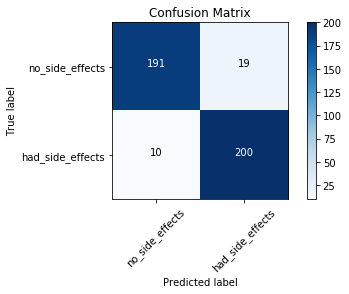

In [65]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')